### MINIMISING THE COST FUNCTION: BATCH GRADIENT DESCENT & ADAPTIVE MOMENT ESTIMATION

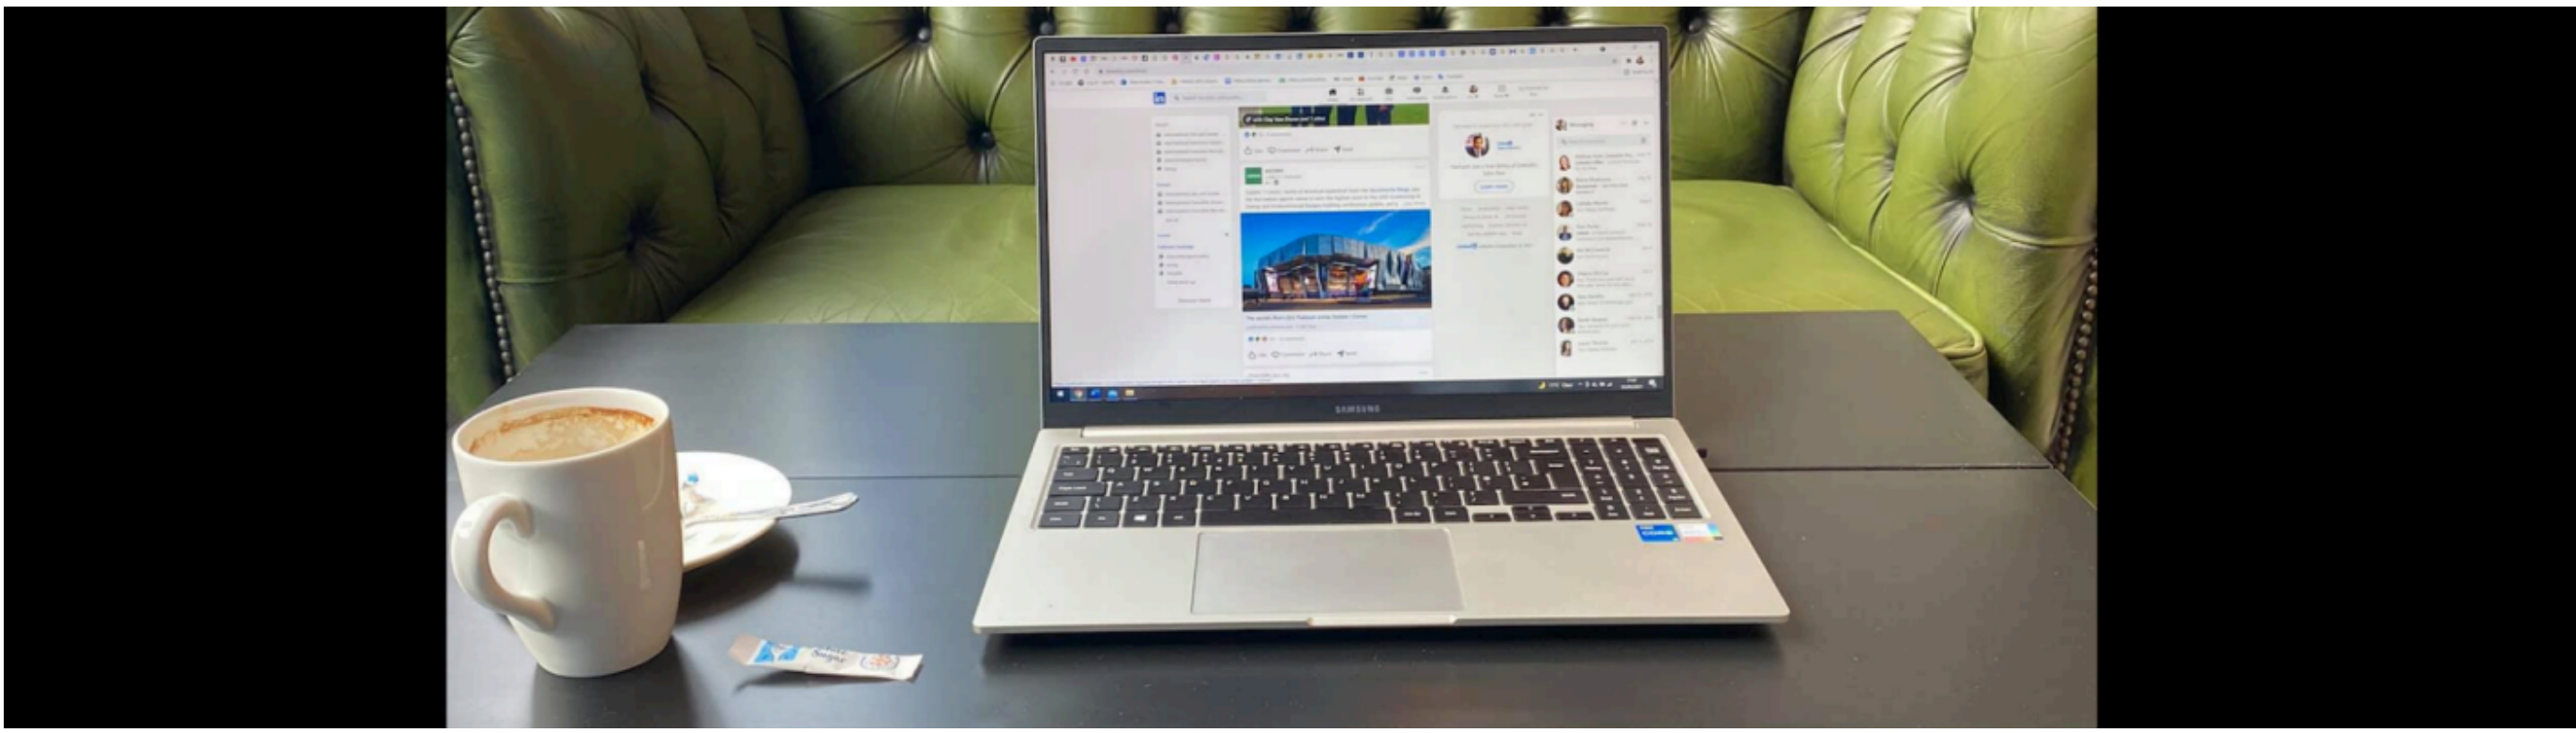

### HEMANT THAPA

#### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#### 2. Data Mining 

In [3]:
class Stock:
    def __init__(self, ticker, period):
        self.ticker = ticker
        self.period = period
        
    def chart(self):
        return yf.download(self.ticker.upper(), period=self.period)

In [4]:
hsbc = Stock("HSBA.L", "5Y").chart()
lloyds = Stock("LLOY.L", "5Y").chart()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
class StandardScale:
    def __init__ (self, data):
        self.data = data
    
    def scale_fit(self):
        return (self.data - self.data.mean())/self.data.std()

#### CONVERTING PENCE INTO POUND

In [6]:
hsbc['Close'] = hsbc['Close']/100

In [7]:
hsbc[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-17,642.700012,646.500000,637.200012,6.389,492.143219,14630696
2019-01-18,644.000000,652.799988,642.000000,6.518,502.080017,26825470
2019-01-21,648.000000,652.299988,646.500000,6.500,500.693390,11961630
2019-01-22,643.299988,645.700012,639.000000,6.413,493.991913,18506455
2019-01-23,638.900024,641.700012,633.799988,6.390,492.220154,18710776


In [8]:
hsbc = StandardScale(hsbc).scale_fit()

In [9]:
hsbc[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-17,1.269298,1.257117,1.262975,1.230660,0.391795,-0.882115
2019-01-18,1.282142,1.319413,1.310395,1.358335,0.494390,-0.240104
2019-01-21,1.321664,1.314469,1.354852,1.340520,0.480074,-1.022631
2019-01-22,1.275226,1.249207,1.280758,1.254413,0.410883,-0.678070
2019-01-23,1.231753,1.209653,1.229385,1.231649,0.392590,-0.667313


In [10]:
lloyds['Close'] = lloyds['Close']/100

In [11]:
lloyds[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-17,55.669998,56.430000,54.930000,0.5613,43.120052,124980675
2019-01-18,56.580002,58.070000,56.299999,0.5800,44.556614,201327841
2019-01-21,58.099998,58.220001,57.650002,0.5800,44.556614,145100964
2019-01-22,57.200001,57.919998,57.150002,0.5743,44.118732,140766858
2019-01-23,57.189999,57.459999,56.980000,0.5730,44.018864,146442088


In [12]:
# lloyds = StandardScale(lloyds).scale_fit()

In [13]:
lloyds[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-17,55.669998,56.430000,54.930000,0.5613,43.120052,124980675
2019-01-18,56.580002,58.070000,56.299999,0.5800,44.556614,201327841
2019-01-21,58.099998,58.220001,57.650002,0.5800,44.556614,145100964
2019-01-22,57.200001,57.919998,57.150002,0.5743,44.118732,140766858
2019-01-23,57.189999,57.459999,56.980000,0.5730,44.018864,146442088


#### 3. Feature Selection 

In [14]:
#feature
X = hsbc.Close.values.reshape(-1,1).astype('float')

In [15]:
#target
y = lloyds.Close.values.reshape(-1,1).astype('float')

In [16]:
X.shape

(1262, 1)

In [17]:
def shape(X, y):
    if len(X) == len(y):
        print("Shape of X is equal to y")
        print(f"X shape: {X.shape}")
        print(f"y shape: {y.shape}")
        return X, y
    elif len(X) > len(y):
        X_new = X[:len(y)]
        print(f"X shape after truncation: {X_new.shape}")
        print(f"y shape: {y.shape}")
        return X_new, y
    elif len(y) > len(X):
        y_new = y[:len(X)]
        print(f"X shape: {X.shape}")
        print(f"y shape after truncation: {y_new.shape}")
        return X, y_new

In [18]:
X, y = shape(X,y)

X shape after truncation: (1260, 1)
y shape: (1260, 1)


#### 4. Train Test and Split 

In [19]:
#80 percent train and 20 percent test
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2)

In [20]:
print(X_test.shape)
print(y_test.shape)

(1008, 1)
(1008, 1)


In [21]:
print(X_train.shape)
print(y_train.shape)

(252, 1)
(252, 1)


In [22]:
#training model
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [23]:
#prediction
y_pred = model.predict(X_test)

#### 5. Best Fit Line

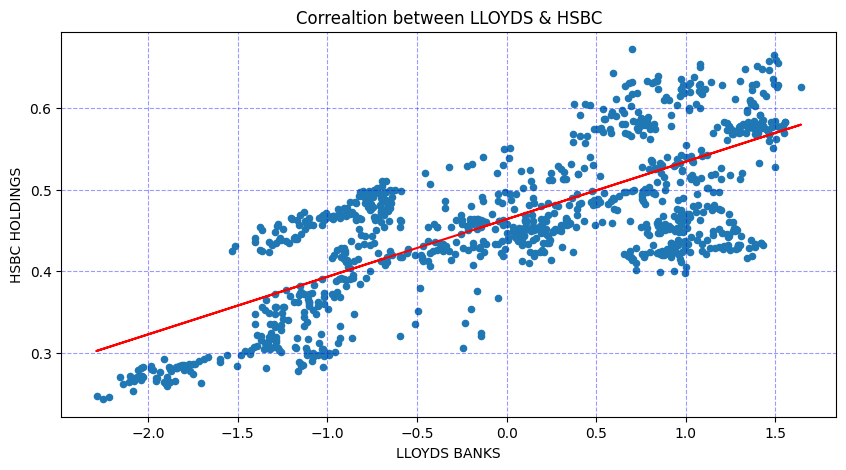

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, s=20)
plt.plot(X_test, y_pred, color="red")
plt.xlabel('LLOYDS BANKS')
plt.ylabel('HSBC HOLDINGS')
plt.title('Correaltion between LLOYDS & HSBC')
plt.grid(True, linestyle="--", color="blue", alpha=0.4)
plt.show()

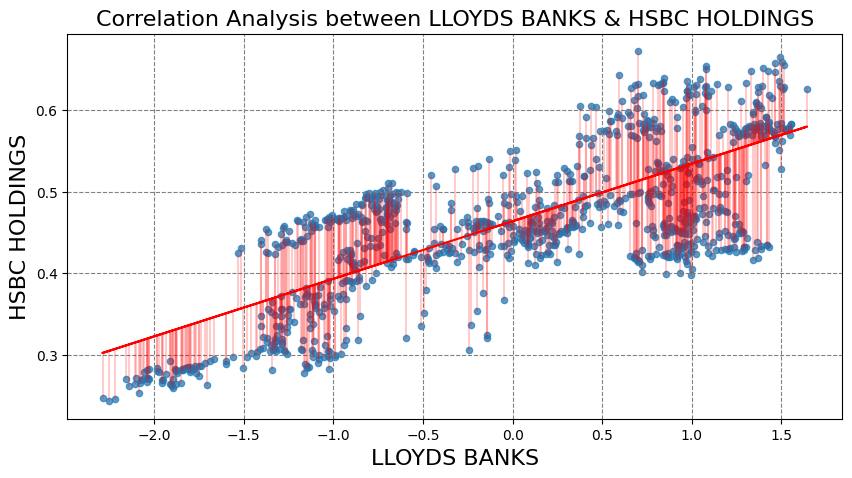

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, s= 20, alpha=0.7)
plt.plot(X_test, y_pred, color="red")
plt.title("Correlation Analysis between LLOYDS BANKS & HSBC HOLDINGS", fontsize=16)
plt.xlabel("LLOYDS BANKS", fontsize=16)
plt.ylabel("HSBC HOLDINGS", fontsize=16)
plt.grid(True, linestyle="--", color="grey")
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], model.predict(X_test[i].reshape(-1,1))[0]], '-r', alpha=0.2)
plt.show()

#### 6. R Square and Cost Functions

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_square)

Mean Absolute Error: 0.052049461771947435
Mean Squared Error: 0.003879991078610023
Root Mean Squared Error: 0.06228957439740637
R-squared: 0.5452691140624379


#### 7. Gradient Descent 

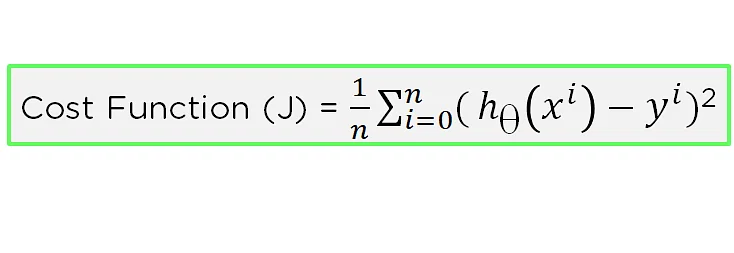

#### Gradient descent is an efficient optimization algorithm that attempts to find a local or global minimum of the cost function.

1. A local minimum is a point where our function is lower than all neighboring points. It is not possible to decrease the value of the cost function by making infinitesimal steps.

2. A global minimum is a point that obtains the absolute lowest value of our function, but global minima are difficult to compute in practice.

In [27]:
class GradientDescent:
    def __init__(self, x, y, m_curr=0, c_curr=0, iteration=1000, rate=0.01):
        self.x = x
        self.y = y
        #predicted y using initial slope and intercept
        self.predicted_y = (m_curr * x) + c_curr  
        self.m_curr = m_curr
        self.c_curr = c_curr
        self.iteration = iteration
        self.rate = rate
    def cost_function(self):
        N = len(self.y)
         #mean squared error
        return sum((self.y - self.predicted_y) ** 2) / N
    
    def calculation(self):
        N = float(len(self.y))
        gradient_descent = pd.DataFrame(columns=['m_curr', 'c_curr', 'cost'])
        # Perform gradient descent iterations
        for i in range(self.iteration):
            # Calculate the predicted y values using current slope and intercept
            self.predicted_y = (self.m_curr * self.x) + self.c_curr
            cost = self.cost_function()
             # Calculate gradients for slope (m_grad) and intercept (c_grad)
            m_gradient = -(2/N) * np.sum(self.x * (self.y - self.predicted_y))
            c_gradient = -(2/N) * np.sum(self.y - self.predicted_y)
            # Update the slope and intercept using gradient and learning rate
            self.m_curr -= self.rate * m_gradient
            self.c_curr -= self.rate * c_gradient
            
            gradient_descent.loc[i] = [self.m_curr, self.c_curr, cost]
            
        return gradient_descent

In [28]:
#training model
gd = GradientDescent(X_train, y_train).calculation()

In [29]:
gd['cost'] = gd['cost'].explode()

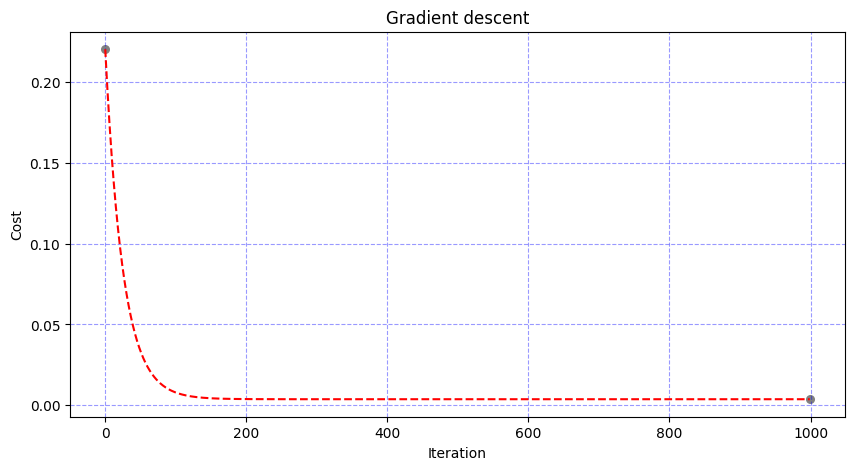

In [30]:
#plot loss
plt.figure(figsize=(10,5))
gd.cost.plot(color="red", linestyle="--")
plt.scatter(gd.index[-1:], gd.cost[-1:], s=30, color="grey")
plt.scatter(gd.index[0:1], gd.cost[0:1], s=30, color="grey")
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Gradient descent')
plt.grid(True, linestyle="--", color="blue", alpha=0.4)
plt.show()

In [31]:
#final slope and intercept values from the gradient descent results
best_fit_slope = gd['m_curr'].iloc[-1]
best_fit_intercept = gd['c_curr'].iloc[-1]
#best-fit line using the final slope and intercept values
y_pred = best_fit_slope * X_test + best_fit_intercept

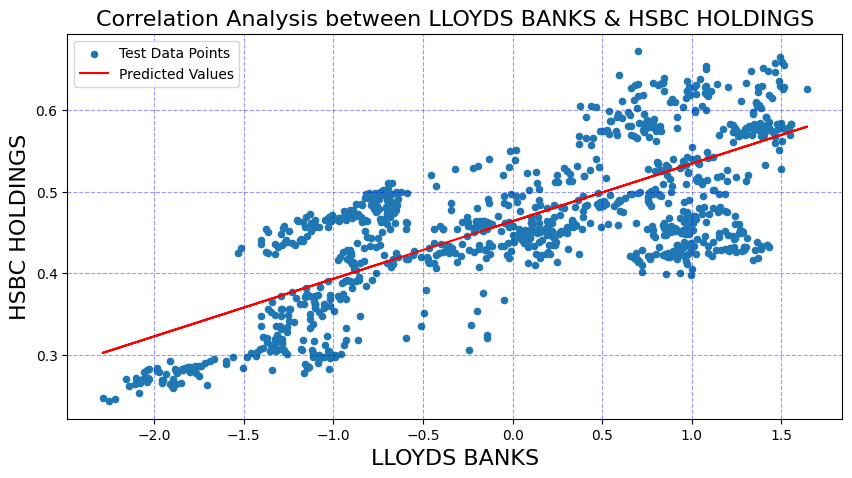

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, s=20, label='Test Data Points')
plt.plot(X_test, y_pred, color="red", label='Predicted Values')
plt.title("Correlation Analysis between LLOYDS BANKS & HSBC HOLDINGS", fontsize=16)
plt.xlabel("LLOYDS BANKS", fontsize=16)
plt.ylabel("HSBC HOLDINGS", fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", color="blue", alpha=0.4)
plt.show()

In [33]:
#R square
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.545269118125026


#### 8. Residual Analaysis 

In [34]:
residuals = y_test - y_pred

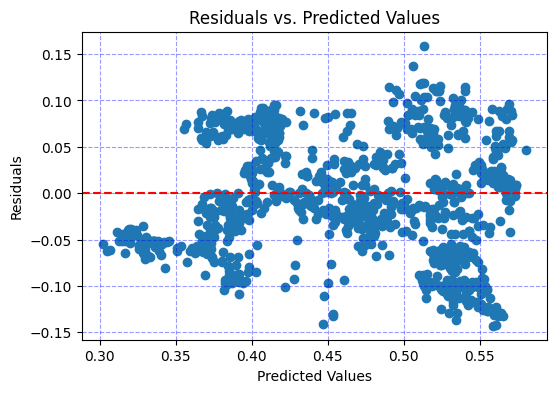

In [35]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, ls='--', color='red') 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.grid(True, linestyle="--", color="blue", alpha=0.4)
plt.show()

In [36]:
from scipy import stats

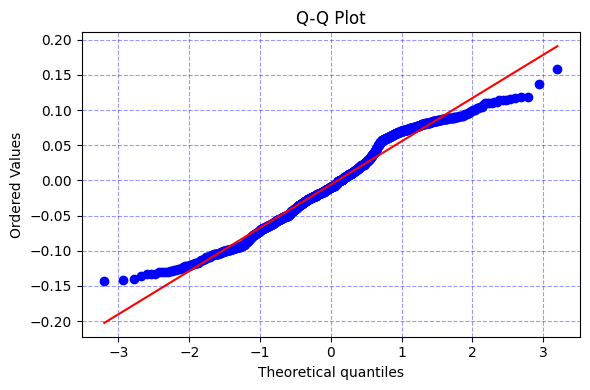

In [37]:
#QQplot 
plt.figure(figsize=(6, 4))
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(True, linestyle="--", color="blue", alpha=0.4)
plt.tight_layout()
plt.show()

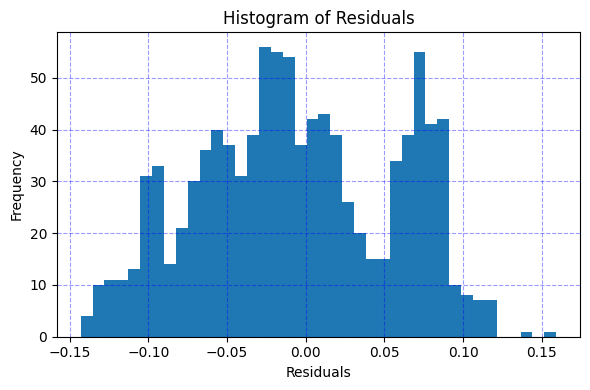

In [38]:
#Histo Plot
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=40)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True, linestyle="--", color="blue", alpha=0.4)
plt.tight_layout()
plt.show()

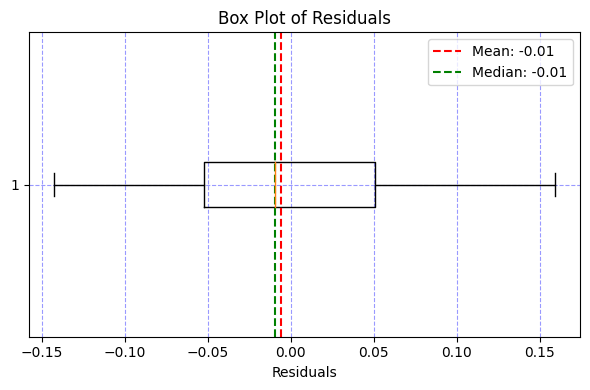

In [39]:
#box plot
mean_residual = np.mean(residuals)
median_residual = np.median(residuals)

plt.figure(figsize=(6, 4))
plt.boxplot(residuals, vert=False)
plt.axvline(mean_residual, color='red', linestyle='--', label=f'Mean: {mean_residual:.2f}')
plt.axvline(median_residual, color='green', linestyle='--', label=f'Median: {median_residual:.2f}')
plt.xlabel("Residuals")
plt.title("Box Plot of Residuals")
plt.legend()
plt.grid(True, linestyle="--", color="blue", alpha=0.4)
plt.tight_layout()
plt.show()

#### 9. Deep Learning Model

##### Feature Selection 

In [40]:
#feature
X = hsbc.Close.values.reshape(-1,1).astype('float')
#target
y = lloyds.Close.values.reshape(-1,1).astype('float')

##### Checking Shape

In [41]:
X, y = shape(X,y)

X shape after truncation: (1260, 1)
y shape: (1260, 1)


##### Train Test and Validation Set

In [42]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=False)

##### Creating Model 

In [43]:
model = Sequential([
    Dense(units=1, input_shape=(1,), activation='linear', use_bias=True)
])

##### Adaptive Moment Estimation 

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)

In [46]:
y_pred = model.predict(X_train)
y_pred[:5]

26/26 [==============================] - 0s 1ms/step


array([[0.5082272 ],
       [0.38500947],
       [0.49268568],
       [0.47983274],
       [0.40592828]], dtype=float32)

##### Residual Error

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_train, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_square)

Mean Absolute Error: 0.051946146576931106
Mean Squared Error: 0.0038354145225897576
Root Mean Squared Error: 0.06193072357553848
R-squared: 0.5380905344159086


In [49]:
y_pred.shape

(806, 1)

In [50]:
X_train.shape

(806, 1)

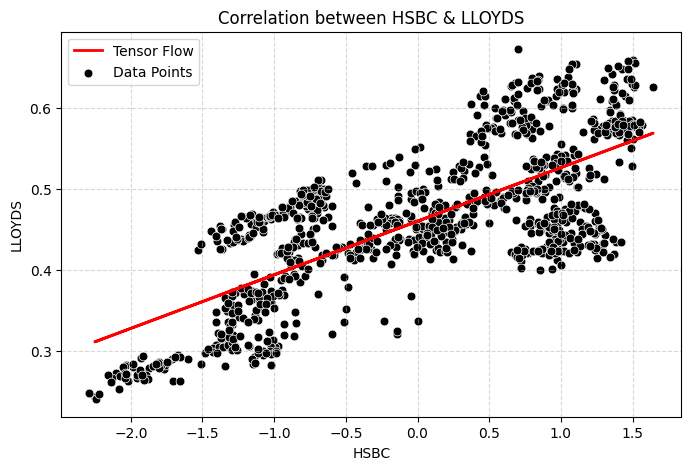

In [51]:
plt.figure(figsize=(8,5))
plt.plot(X_train, y_pred, color='red', label='Tensor Flow', linewidth=2)
sns.scatterplot(x=X_train_temp[:, 0].flatten(), y=y_train_temp.flatten(), color='black', label='Data Points', s=40)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("HSBC")
plt.ylabel("LLOYDS")
plt.title("Correlation between HSBC & LLOYDS")
plt.legend()
plt.show()

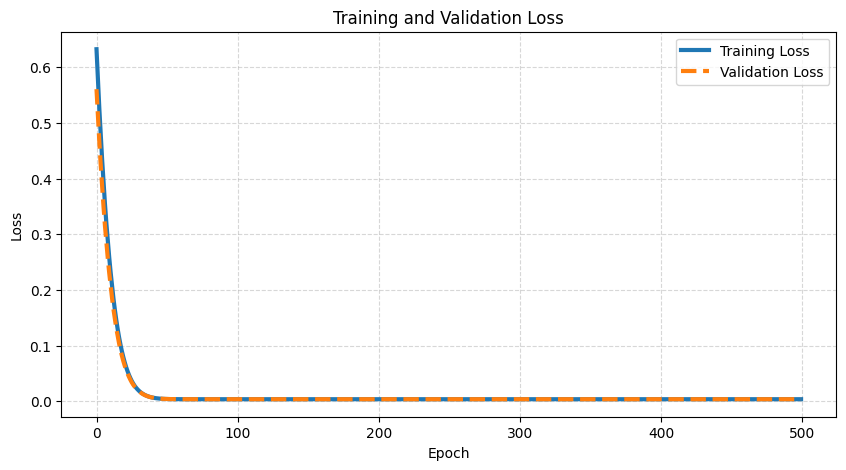

In [52]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=3)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=3, linestyle="--")
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### REFERENCES: 
    
Towards Data Science. (Year, Month Day). Minimizing the Cost Function: Gradient Descent. Towards Data Science. https://towardsdatascience.com/minimizing-the-cost-function-gradient-descent-a5dd6b5350e1

Study.com. (Year). Average Cost Function: Formula & Examples. Study.com. https://study.com/learn/lesson/average-cost-function-formula-examples.html